In [3]:
# Gerekli Kütüphaneler
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.metrics import mean_squared_error

In [4]:
# Veri Setimizi Okuduk
data = pd.read_csv("DATA/seeds_dataset.txt",sep = "\t", header = None)

In [5]:
data.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [6]:
# Verilerimi düzenliyoruz
data = data.iloc[:,1:-1].values

In [7]:
# AgglomerativeClustering sınıfından bir nesne ürettik
# n_clusters = Ayıracağımız küme sayısı
# linkage ve Metric = mesafe ölçüm yöntemleri
ag = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

In [8]:
# Kümeleme ve tahmin işlemi yap
predict = ag.fit_predict(data)

In [9]:
predict

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1], dtype=int64)

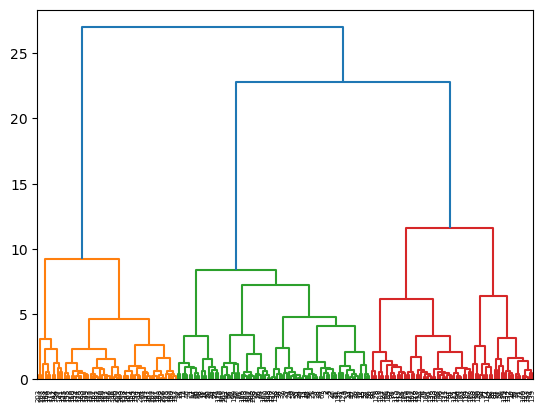

In [10]:
# Dendrogram Grafiği oluşturuyouz
dendrogram = sch.dendrogram(sch.linkage(data,method='ward'))
plt.show()

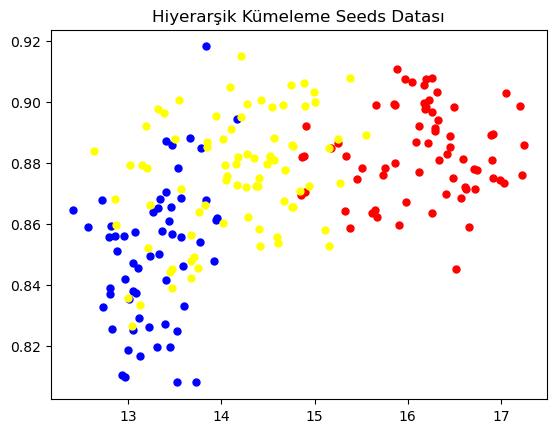

In [11]:
# Grafik şeklinde ekrana basmak için
plt.scatter(data[predict==0,0],data[predict==0,1],s=25,color='red')
plt.scatter(data[predict==1,0],data[predict==1,1],s=25,color='blue')
plt.scatter(data[predict==2,0],data[predict==2,1],s=25,color='yellow')
plt.title("Hiyerarşik Kümeleme Seeds Datası")
plt.show()

In [13]:
# Ortalama Kare Hatasını Hesapla
# Önce gerçek sınıfları oku (Iris veri seti için)
true_labels = pd.read_csv("DATA/seeds_dataset.txt",sep = "\t", header = None)[7]

In [14]:
# Ortalama Kare Hatasını Hesapla
mse = mean_squared_error(true_labels, predict)
print("Ortalama Kare Hatası:", mse)

Ortalama Kare Hatası: 2.6714285714285713
